In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import model
import simulate

In [14]:
device = "cpu"
random_seed = 2025
r2 = 0.5
n = 1000
dim = 112
coord, true_beta, img_data, y = simulate.simulate_data(n, r2, dim, random_seed)

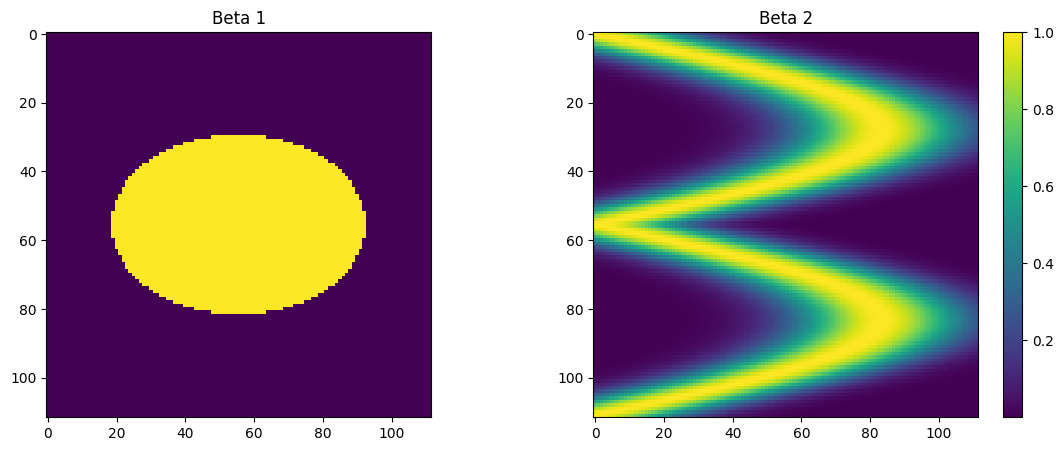

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (14,5))
axs[0].imshow(true_beta[0].reshape(dim, dim))
axs[0].set_title("Beta 1")

cax = axs[1].imshow(true_beta[1].reshape(dim, dim))
axs[1].set_title("Beta 2")

fig.colorbar(cax, ax = axs[1])
plt.show()



In [21]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

image_data_0_reshaped = img_data[0].reshape(n, dim, dim)
image_data_1_reshaped = img_data[1].reshape(n, dim, dim)

stacked_img = np.concatenate([image_data_0_reshaped, image_data_1_reshaped], axis = 1)
stacked_img = stacked_img[:, np.newaxis, :, :]

y = y.reshape(-1, 1)
y_tensor = torch.tensor(y, dtype = torch.float32).to(device)
stacked_img = torch.tensor(stacked_img, dtype = torch.float32).to(device)

torch.manual_seed(random_seed)
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(stacked_img_tensor, y_tensor, test_size = 0.2, random_state = random_seed)
train_dataset = TensorDataset(X_train, y_train)
test_dataset =  TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle = False)

In [28]:
cnn = model.CNN2d().to(device)
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.001)

num_epochs = 100
for epoch in range(num_epochs):
    cnn.train()
    running_loss = 0.0
    y_pred, y_true = [], []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_hat_batch = cnn(X_batch)
        loss = criterion(y_hat_batch, y_batch)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            running_loss += loss.item()
            y_pred.extend(y_hat_batch.detach().cpu().numpy().flatten()) 
            y_true.extend(y_batch.cpu().numpy().flatten())
    if (epoch + 1) % 5 == 0:
        train_r2 = np.corrcoef(y_true, y_pred)[0, 1] ** 2
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len (train_loader)}, Train R^2： {train_r2}")

    if (epoch + 1) % 5 == 0:
        cnn.eval()
        with torch.no_grad():
            y_hat_test = cnn(X_test).detach().cpu().numpy().flatten()
            test_r2 = np.corrcoef(y_test.cpu().numpy().flatten(), y_hat_test)[0, 1]**2
        print(f"Epoch {epoch + 1}, Test R^2: {test_r2}")

Epoch 5, Loss: 69.53245819091796, Train R^2： 0.5550407672045918
Epoch 5, Test R^2: 0.38553741414584947
Epoch 10, Loss: 48.77118583679199, Train R^2： 0.6860186294223432
Epoch 10, Test R^2: 0.3949378562388183
Epoch 15, Loss: 40.641201934814454, Train R^2： 0.7389451290182888
Epoch 15, Test R^2: 0.3573806291014604
Epoch 20, Loss: 34.38984991073608, Train R^2： 0.7784032569948038
Epoch 20, Test R^2: 0.36788559635342044
Epoch 25, Loss: 33.334377918243405, Train R^2： 0.7860307184147249
Epoch 25, Test R^2: 0.37805821067909906
Epoch 30, Loss: 28.25229525566101, Train R^2： 0.8184628489097264
Epoch 30, Test R^2: 0.3950571785955594
Epoch 35, Loss: 28.956345920562743, Train R^2： 0.8135409225605508
Epoch 35, Test R^2: 0.3069885933313983
Epoch 40, Loss: 23.640111627578737, Train R^2： 0.8477230713582198
Epoch 40, Test R^2: 0.3875062958168228
Epoch 45, Loss: 24.667410736083983, Train R^2： 0.8416721374021948
Epoch 45, Test R^2: 0.37752312911013713
Epoch 50, Loss: 24.07523895263672, Train R^2： 0.845316952